# Kunskapskontroll 1 

### Fyll i uppgifterna nedan (obligatoriskt för att bli godkänd) innan du lämnar in på Omniway: 
Namn: Quang tri Tran

Datum då du presenterade ditt arbete på lektionen: 

Presenterade du inte det på lektionen, skriv vem du har diskuterat igenom koden med: Ali Hamza 

# Task

As a data analyst there is plenty of opportunity to improve processes or suggest improved ways of doing things. When doing so it is often very smart and efficient (time is a scarce resource) to create a POC (Proof of Concept) which basically is a small demo checking wether it is worthwile going further with something. It is also something concrete which facilitates discussions, do not underestimate the power of that. 

In this example, you are working in a company that sells houses and they have a "manual" process of setting prices by humans. You as a Data Scientist can make this process better by using Machine Learning. Your task is to create a POC that you will present to your team colleagues and use as a source of discussion of wether or not you should continue with more detailed modelling. 

Two quotes to facilitate your reflection on the value of creating a PoC: 

"*Premature optimization is the root of all evil*". 

"*Fail fast*".


**More specifially, do the following:**
1. A short EDA (Exploratory Data Analysis) of the housing data set.
2. Drop the column "ocean_proximity", then you only have numeric columns which will simplify your analysis. Remember, this is a POC!
3. Split your data into train and test set.
4. You have missing values in your data. Handle this with [ SimpleImputer(strategy="median") ], check the fantastic Scikit-learn documentation for details.
5. Create one "Linear Regression" model and one "Lasso" model. For the Lasso model, use GridSearchCV to optimize $\alpha$ values, choose yourself which $\alpha$ values to evaluate.
Use RMSE as a metric to decide which model to choose. 

7. Evaluate your chosen model on the test set using the root mean squared error (RMSE) as the metric. Conclusions? 

8. Do a short presentation (~ 2-5 min) on your POC that you present to your colleagues (no need to prepare anything particular, just talk from the code). Think of:
- What do you want to highlight/present?
- What is your conclusion?
- What could be the next step? Is the POC convincing enough or is it not worthwile continuing? Do we need to dig deeper into this before taking some decisions?

# Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# Below, set your own path where you have stored the data file. 
housing = pd.read_csv(r'C:\Users\Boota Lay\ec_utbildning\ML_kunskapkontroll_1\housing.csv')

In [3]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## EDA

In [4]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [5]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
print(housing.shape)

(20640, 10)


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
# Number of numerical features exclude dtype "object"
numerical_feats = housing.dtypes[housing.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

Number of Numerical features:  9


In [9]:
# Number of categorical features 
Cat_feats = housing.dtypes[housing.dtypes == "object"].index
print("Number of Categorical features: ", len(Cat_feats))

Number of Categorical features:  1


In [10]:
# Remove "ocean_proximity" column to only show numerical features
housing.drop("ocean_proximity", axis=1, inplace=True)

In [11]:
# Correlation matrix to understand how features are related to each other
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


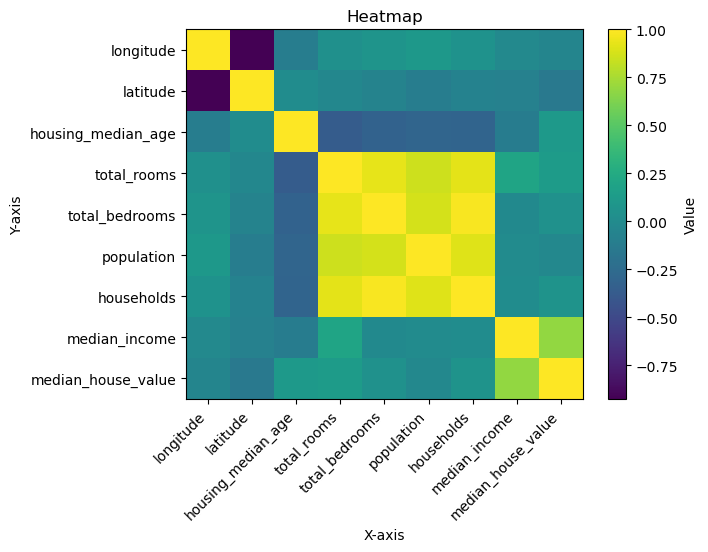

In [12]:
# Create heatmap from correlation matrix
plt.imshow(corr_matrix, cmap='viridis', aspect='auto')

plt.xticks(np.arange(len(corr_matrix)), corr_matrix.columns.tolist(), rotation=45, ha='right')

plt.yticks(np.arange(len(corr_matrix)), corr_matrix.index.tolist())

plt.colorbar(label='Value')  # Add colorbar with label
plt.title("Heatmap")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [13]:
# Finding missing values
print("Missing values:\n", housing.isnull().sum())

Missing values:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64


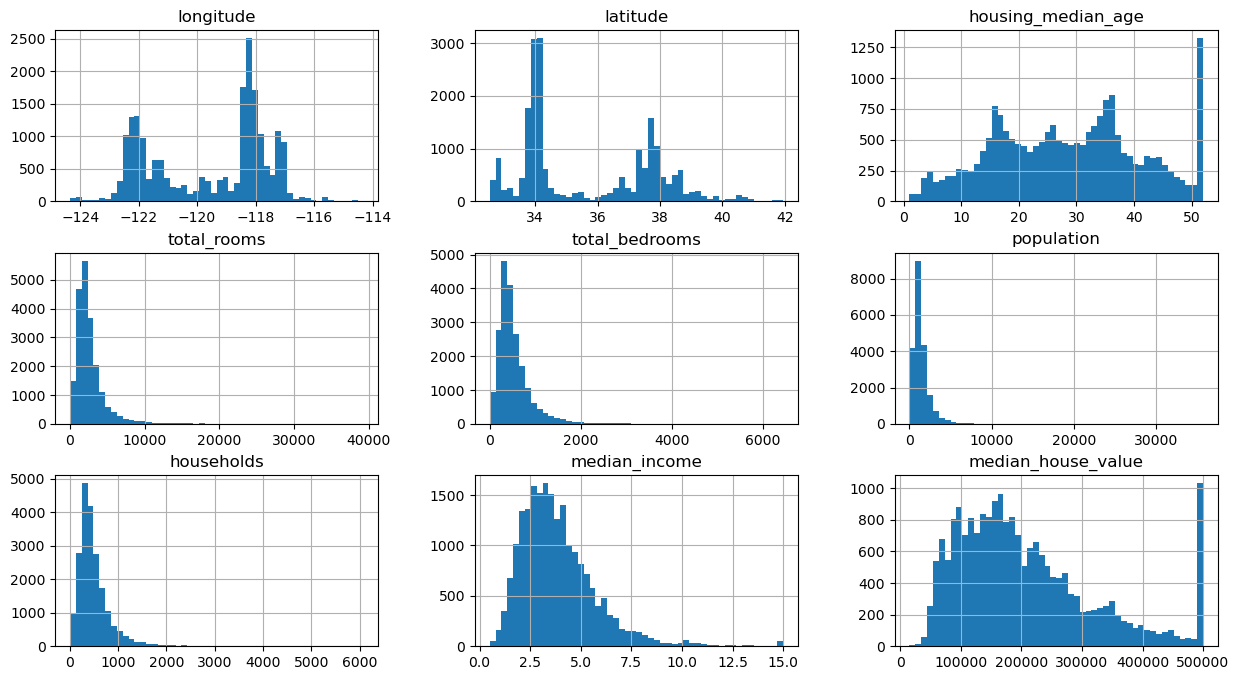

In [14]:
# Histogram plot to understand distribution of numerical features
housing.hist(bins= 50, figsize=(15, 8))
plt.show()

# Train & Test Split

In [15]:
# X contains feature data excluding the target variable data
X = housing.drop(columns =['median_house_value'], axis=1)

# y contains the target variable data, "value to predict"
y = housing['median_house_value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [16]:
# Verify if split correctly
print("Training data shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing data shape (X_test, y_test):", X_test.shape, y_test.shape)

Training data shape (X_train, y_train): (16512, 8) (16512,)
Testing data shape (X_test, y_test): (4128, 8) (4128,)


In [17]:
# data shape
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [18]:
# Verify split ratio
print(X_train.shape[0] / X.shape[0]) #train model split 70%
print(X_test.shape[0] / X.shape[0])  #test model split 30%

0.8
0.2


# Pipeline for easier preprocessing data step

In [53]:
pipe = Pipeline([
    ('Imputer', SimpleImputer(strategy='median')),
    ('Scaler', StandardScaler())
    
])

# Fit and transform Training data
X_train_prep = pipe.fit_transform(X_train)

# Transform Test data
X_test_prep = pipe.transform(X_test)

Why Preprocess after splitting?

The purpose of the test set is to evaluate your model’s performance on unseen data.
If you impute before splitting, the imputer “sees” the entire dataset, including the test set. This violates the separation between training and testing data.

# Linear Regression model

In [48]:
# Initialize Linear regression model
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

# Cross validate with cross_val_score
CV_model_LR = cross_val_score(model_LR, X_train_prep, y_train, cv=5, scoring='neg_mean_squared_error')

# This is our validation score for the model
CV_model_avgscore = np.mean(np.sqrt(- CV_model_LR))

print('Avg linear_R RMSE: ',CV_model_avgscore)


Avg linear_R RMSE:  69532.25257997937


Good reminder: 

When using cross_val_score or other evaluation functions, you want to maximize the score.

Therefore, you should look for the most negative (closest to 0) value for neg_mean_squared_error.

In your case, all values are negative, and the smallest (most negative) value corresponds to the best model performance.

# Lasso Regression model

In [49]:
# Initialize lasso model
model_lasso = Lasso()

# Parameters and Gridsearch to find best Alpha value for the lasso model
params = {'alpha': [1, 10, 20, 30, 40]} 
GS_lasso = GridSearchCV(model_lasso, params, cv=5)

GS_lasso.fit(X_train_prep, y_train)

best_GS_lasso = GS_lasso.best_estimator_

print(best_GS_lasso)

# Lasso model validation score
CV_lasso = cross_val_score(GS_lasso, X_train_prep, y_train, cv=5, scoring='neg_mean_squared_error')
lasso_score = np.sqrt(-CV_lasso)

lasso_rmses = np.mean(lasso_score)

print('Avg Lasso RMSE: ',lasso_rmses)


Lasso(alpha=40)
Avg Lasso RMSE:  69532.67476787997


# Evaluation

In [50]:
print('Difference between Lasso and Linear Regression :', lasso_rmses - CV_model_avgscore)

Difference between Lasso and Linear Regression : 0.4221879006072413


With lasso model being the slightly better out of the two models, we will choose the lasso model for our final testing and see if it can predict our testing data.


In [51]:
#Transform feature test data with same pipeline
X_test_transformed = pipe.transform(X_test)

#Make predictions
y_pred = GS_lasso.predict (X_test_prep)
y_rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Mean squared error(RMSE) at: ',y_rmse)

Mean squared error(RMSE) at:  71108.36420074178


In [52]:
percentage_error = (y_rmse / y_test.mean()) * 100
print(f"Percentage of error from predictions: {percentage_error:.2f}%")

Percentage of error from predictions: 34.60%


# Conclusion

After training the computer to learn from historical data and training with two different models, there is one model who were slightly better than the other by a small marginal. In this case it was the Lasso model who perfomed better than the Linear Regression model. 

The RMSE of our predictions on the test data is approximately 71 108.36 which quantify as the average difference between the actual target values and the predicted values.

The percentage of error is approximately 34.60% this means that on average our predictions deviate from the actual target values by 34.60%. Meaning we have an accuracy of 65.40% of the times to hit the target values. Raising the accuracy needs more testing and fine tuning to the model.